<a href="https://colab.research.google.com/github/pthakran/Accelerometer-Pogram/blob/master/CatvsDogConvnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1diTHwfeGDAslXXF2Yv_e0NusI7clQK9C

Downloading...
From: https://drive.google.com/uc?id=1diTHwfeGDAslXXF2Yv_e0NusI7clQK9C
To: /content/dogs-vs-cats.zip
852MB [00:10, 78.4MB/s]


In [2]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [3]:
!unzip test1.zip
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [4]:
import os
import shutil

original_dataset_dir = 'train'

base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dst)        

In [5]:
print("total training cat images: ", len(os.listdir(train_cats_dir)))
print("total training dog images: ", len(os.listdir(train_dogs_dir)))
print("total validation cat images: ", len(os.listdir(validation_cats_dir)))
print("total validation dog images: ", len(os.listdir(validation_dogs_dir)))
print("total test cat images: ", len(os.listdir(test_cats_dir)))
print("total test dog images: ", len(os.listdir(test_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.001,epsilon=1e-4), metrics=['acc'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 16s 86ms/step - loss: 0.7336 - acc: 0.4979 - val_loss: 0.6924 - val_acc: 0.5030
Epoch 2/30
100/100 [==============================] - 8s 83ms/step - loss: 0.7038 - acc: 0.5178 - val_loss: 0.6867 - val_acc: 0.5200
Epoch 3/30
100/100 [==============================] - 8s 84ms/step - loss: 0.6924 - acc: 0.5511 - val_loss: 0.6758 - val_acc: 0.5830
Epoch 4/30
100/100 [==============================] - 9s 85ms/step - loss: 0.6458 - acc: 0.6187 - val_loss: 0.6000 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 8s 83ms/step - loss: 0.6088 - acc: 0.6768 - val_loss: 0.5755 - val_acc: 0.7100
Epoch 6/30
100/100 [==============================] - 8s 83ms/step - loss: 0.5252 - acc: 0.7464 - val_loss: 0.6339 - val_acc: 0.6610
Epoch 7/30
100/100 [==============================] - 8s 82ms/step - loss: 0.5203 - acc: 0.7398 - val_loss: 0.5595 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 8s 83ms/step -

In [11]:
model.save('cats_and_dogs_small_1.h5')

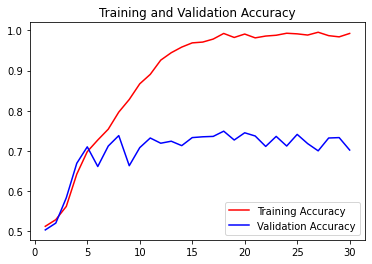

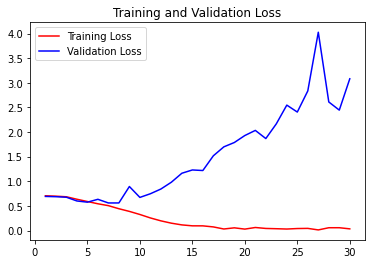

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1)

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [13]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

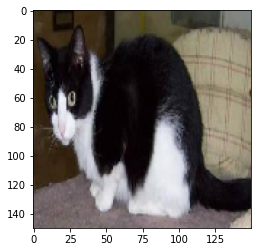

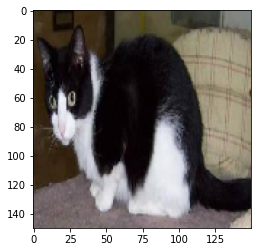

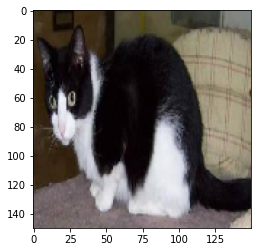

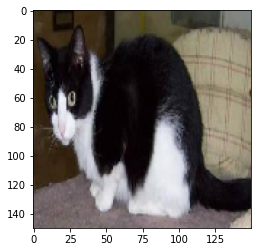

In [25]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
      break


plt.show()

In [15]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.001,epsilon=1e-4), metrics=['acc'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')


history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 17s 165ms/step - loss: 0.8286 - acc: 0.4949 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6952 - acc: 0.5096 - val_loss: 0.6910 - val_acc: 0.5050
Epoch 3/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6938 - acc: 0.5577 - val_loss: 0.6819 - val_acc: 0.6130
Epoch 4/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6797 - acc: 0.5749 - val_loss: 0.6352 - val_acc: 0.6310
Epoch 5/100
100/100 [==============================] - 17s 165ms/step - loss: 0.6490 - acc: 0.6048 - val_loss: 0.6426 - val_acc: 0.5980
Epoch 6/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6323 - acc: 0.6409 - val_loss: 0.6173 - val_acc: 0.6530
Epoch 7/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6435 - acc: 0.6449 - val_loss: 0.6235 - val_acc: 0.6430
Epoch 8/100
100/100 [===========================

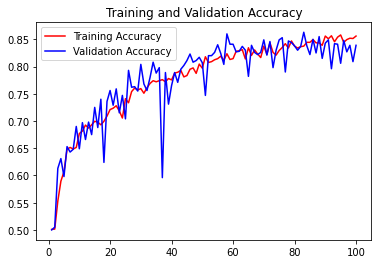

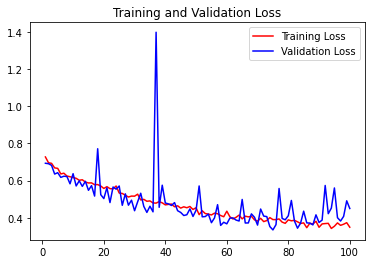

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+ 1)

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [19]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [20]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')

  i = 0

  for input_batch, labels_batch in generator:
    features_batch = conv_base.predict(input_batch)
    features[i*batch_size : (i+1)*batch_size] = features_batch
    labels[i*batch_size : (i+1)*batch_size] =  labels_batch
    i+=1
    if i * batch_size >= sample_count:
      break

  return features, labels


train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001,epsilon=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))


Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 1.4452 - acc: 0.6958 - val_loss: 0.4401 - val_acc: 0.7860
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3807 - acc: 0.8375 - val_loss: 0.2468 - val_acc: 0.9000
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2693 - acc: 0.8914 - val_loss: 0.3621 - val_acc: 0.8490
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2769 - acc: 0.8988 - val_loss: 0.5246 - val_acc: 0.7950
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2267 - acc: 0.9039 - val_loss: 0.3033 - val_acc: 0.8820
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.1810 - acc: 0.9292 - val_loss: 0.2790 - val_acc: 0.9070
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.1719 - acc: 0.9331 - val_loss: 0.2792 - val_acc: 0.9010
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

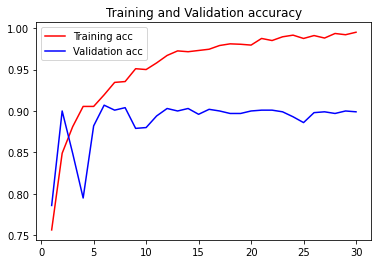

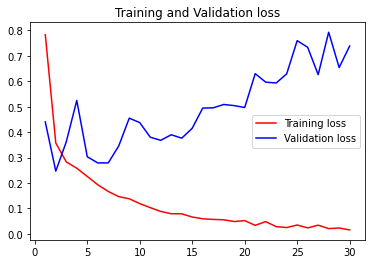

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

print('This is the number of trainable weights before frezzing the conv base: ', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights after frezzing the conv base: ', len(model.trainable_weights))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________
This is the number of trainable weights before frezzing the conv base:  30
This is the number of trainable weights after frezzing the conv base:  4


In [26]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.001,epsilon=2e-5), metrics=['acc'])


history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

model.save('cats_and_dogs_small_3.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 19s 185ms/step - loss: 1.5032 - acc: 0.6091 - val_loss: 0.4233 - val_acc: 0.7960
Epoch 2/30
100/100 [==============================] - 18s 183ms/step - loss: 0.4865 - acc: 0.7694 - val_loss: 0.3362 - val_acc: 0.8380
Epoch 3/30
100/100 [==============================] - 18s 184ms/step - loss: 0.3980 - acc: 0.8160 - val_loss: 0.2928 - val_acc: 0.8700
Epoch 4/30
100/100 [==============================] - 18s 184ms/step - loss: 0.4266 - acc: 0.7992 - val_loss: 0.3251 - val_acc: 0.8520
Epoch 5/30
100/100 [==============================] - 18s 184ms/step - loss: 0.3961 - acc: 0.8164 - val_loss: 0.2533 - val_acc: 0.8970
Epoch 6/30
100/100 [==============================] - 18s 184ms/step - loss: 0.3357 - acc: 0.8497 - val_loss: 0.2455 - val_acc: 0.8970
Epoch 7/30
100/100 [==============================] - 18s 184ms/step - loss: 0.3301 - acc: 0.8540 - val_loss: 0.2389 - val_acc: 0.9000
Epoch 8/30
100/100 [==============================] - 1

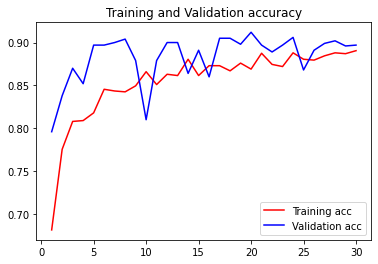

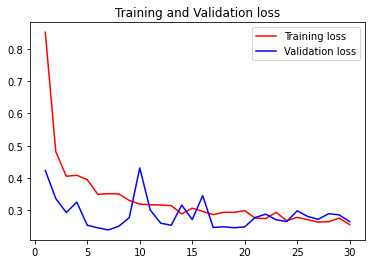

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [29]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable: 
    layer.trainable = True
  else: 
    layer.trainable = False

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.001,epsilon=1e-5), metrics=['acc'])


history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

model.save('cats_and_dogs_small_4.h5')
    

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 20s 192ms/step - loss: 7.9244 - acc: 0.5730 - val_loss: 0.5126 - val_acc: 0.6710
Epoch 2/30
100/100 [==============================] - 19s 189ms/step - loss: 0.5821 - acc: 0.7562 - val_loss: 0.2326 - val_acc: 0.9080
Epoch 3/30
100/100 [==============================] - 19s 190ms/step - loss: 0.4880 - acc: 0.8268 - val_loss: 0.4388 - val_acc: 0.7520
Epoch 4/30
100/100 [==============================] - 19s 188ms/step - loss: 0.3787 - acc: 0.8434 - val_loss: 0.2466 - val_acc: 0.9150
Epoch 5/30
100/100 [==============================] - 19s 189ms/step - loss: 0.3827 - acc: 0.8554 - val_loss: 0.2266 - val_acc: 0.9040
Epoch 6/30
100/100 [==============================] - 19s 188ms/step - loss: 0.3711 - acc: 0.8679 - val_loss: 0.2243 - val_acc: 0.8990
Epoch 7/30
100/100 [==============================] - 19s 187ms/step - loss: 0.3019 - acc: 0.8878 - val_loss: 0.1953 - val_acc: 0.9260
Epoch 8/30
100/100 [==============================] - 1

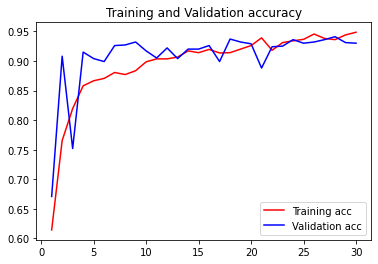

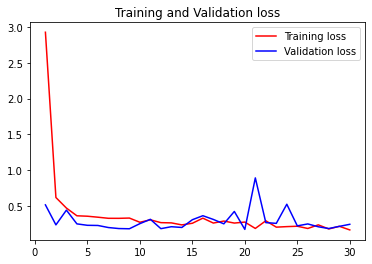

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

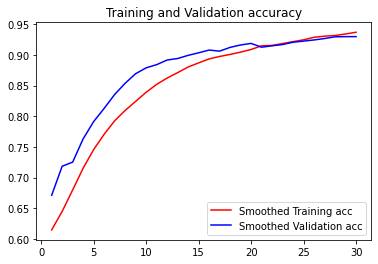

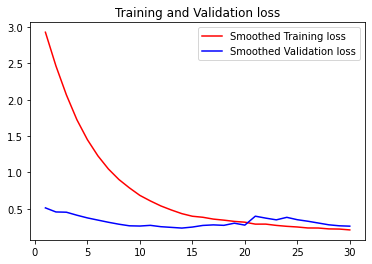

In [31]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'r', label='Smoothed Training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'r', label='Smoothed Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [32]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc: ', test_acc)


Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc:  0.9229999780654907
